In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA


1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

2. Подберите параметры модели SARIMAX для этого ряда.

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

4. Возмите вариант 1 или 2 
    - Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
    - Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19  (по любой стране кроме Китая на дневных графиках )


5. Оцените результат моделирования

6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [2]:
data = pd.read_csv("my_PJME_MW.csv", index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data_m = data[["PJME_MW", "year", "month", "quarter"]].resample("M").mean().sort_index()
data_m.head(5)

,PJME_MW,year,month,quarter
Date,,,,
2002-01-31,31075.399731,2002,1,1
2002-02-28,30239.166667,2002,2,1
2002-03-31,28875.256720,2002,3,1
2002-04-30,28534.731572,2002,4,2
2002-05-31,28073.653226,2002,5,2


In [4]:
data_m['PJME_MW'].shape

(200,)

2. Подберите параметры модели SARIMAX для этого ряда.

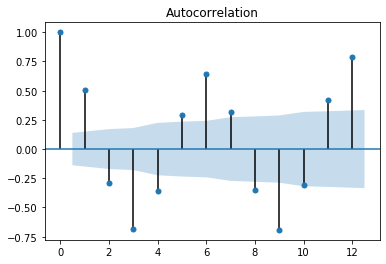

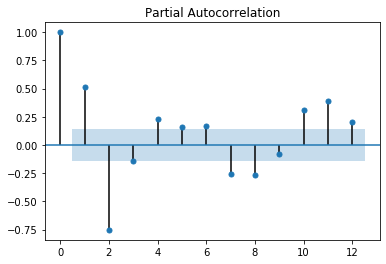

In [5]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=12)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=12)
plt.show()

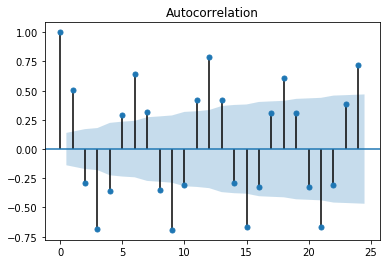

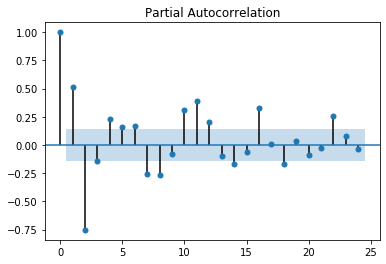

In [6]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=24)
plt.show()

In [7]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

ps = [1] 
ds = [0,1]
qs = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(ps, ds, qs))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (1, 0, 1, 12)
SARIMAX: (0, 0, 1) x (1, 0, 0, 12)
SARIMAX: (0, 0, 2) x (1, 0, 0, 12)
SARIMAX: (0, 0, 2) x (1, 0, 1, 12)


In [8]:
import warnings

min_aic = None
param_optimal = None
param_seasonal_optimal = None

warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values,
                                            order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
            if not min_aic or min_aic > results.aic:
                min_aic = results.aic
                param_optimal = param
                param_seasonal_optimal = param_seasonal                
        except:
            continue
            
            
print('*' * 50)
print('ARIMA {} x {} 3 - AIC:{}'.format(param_optimal, param_seasonal_optimal, min_aic))

ARIMA(0, 0, 0)x(1, 0, 0, 12)3 - AIC:3395.4729852030323
ARIMA(0, 0, 0)x(1, 0, 1, 12)3 - AIC:3374.748426772136
ARIMA(0, 0, 0)x(1, 0, 2, 12)3 - AIC:3120.5216495293516
ARIMA(0, 0, 0)x(1, 1, 0, 12)3 - AIC:3150.4921894031295
ARIMA(0, 0, 0)x(1, 1, 1, 12)3 - AIC:3133.2572647453185
ARIMA(0, 0, 0)x(1, 1, 2, 12)3 - AIC:2898.867195399489
ARIMA(0, 0, 1)x(1, 0, 0, 12)3 - AIC:4252.256233105178
ARIMA(0, 0, 1)x(1, 0, 1, 12)3 - AIC:3325.720874949164
ARIMA(0, 0, 1)x(1, 0, 2, 12)3 - AIC:3430.2352063791413
ARIMA(0, 0, 1)x(1, 1, 0, 12)3 - AIC:3126.359976846858
ARIMA(0, 0, 1)x(1, 1, 1, 12)3 - AIC:3092.841079599963
ARIMA(0, 0, 1)x(1, 1, 2, 12)3 - AIC:2869.960486061297
ARIMA(0, 0, 2)x(1, 0, 0, 12)3 - AIC:3387.99961797978
ARIMA(0, 0, 2)x(1, 0, 1, 12)3 - AIC:4192.011994046619
ARIMA(0, 0, 2)x(1, 0, 2, 12)3 - AIC:3922.664277858389
ARIMA(0, 0, 2)x(1, 1, 0, 12)3 - AIC:3128.833410736437
ARIMA(0, 0, 2)x(1, 1, 1, 12)3 - AIC:3078.127471455029
ARIMA(0, 0, 2)x(1, 1, 2, 12)3 - AIC:2844.0510009801073
ARIMA(0, 1, 0)x(1, 0, 0

ARIMA(2, 2, 1)x(1, 0, 1, 12)3 - AIC:3391.760204062184
ARIMA(2, 2, 1)x(1, 0, 2, 12)3 - AIC:3065.4017482176087
ARIMA(2, 2, 1)x(1, 1, 0, 12)3 - AIC:3105.769169960422
ARIMA(2, 2, 1)x(1, 1, 1, 12)3 - AIC:3083.0050525744937
ARIMA(2, 2, 1)x(1, 1, 2, 12)3 - AIC:2881.396953430719
ARIMA(2, 2, 2)x(1, 0, 0, 12)3 - AIC:3347.0160465691706
ARIMA(2, 2, 2)x(1, 0, 1, 12)3 - AIC:3319.7777724934076
ARIMA(2, 2, 2)x(1, 0, 2, 12)3 - AIC:3095.14340638755
ARIMA(2, 2, 2)x(1, 1, 0, 12)3 - AIC:3121.6356844156962
ARIMA(2, 2, 2)x(1, 1, 1, 12)3 - AIC:3067.9856589416668
ARIMA(2, 2, 2)x(1, 1, 2, 12)3 - AIC:2857.172401092563
**************************************************
ARIMA (0, 1, 2) x (1, 1, 2, 12) 3 - AIC:2818.395758422374


3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

In [9]:
mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],
                                    order=param_optimal,
                                    seasonal_order=param_seasonal_optimal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

In [10]:
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2606.3201809786383


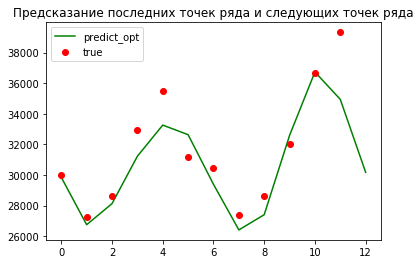

In [11]:
plt.plot(results_opt.forecast(13), "g", label="predict_opt")
plt.plot(data_m["PJME_MW"].values[-12:], "or", label="true")
plt.title("Предсказание последних точек ряда и следующих точек ряда")
plt.legend()

plt.show()

Недельный аик 7316, месячный 2606. Получается месячная модель лучше недельной.

4. Возмите вариант 1 или 2 
    - Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

In [12]:
brent_data = pd.read_csv('my_BRENT2019.csv', sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [13]:
brent_data.info()
в

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 11 columns):
Значение           2667 non-null float64
year               2667 non-null int64
month              2667 non-null int64
dayofmonth         2667 non-null int64
quarter            2667 non-null int64
dayofyear          2667 non-null int64
weekofyear         2667 non-null int64
dayofweek          2667 non-null int64
is_holiday         2667 non-null int64
is_prev_holiday    2667 non-null int64
is_next_holiday    2667 non-null int64
dtypes: float64(1), int64(10)
memory usage: 250.0 KB


NameError: name 'в' is not defined

In [ ]:
brent_data_w = brent_data[["Значение"]].resample('W').mean().sort_index()
brent_data_w.head()

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(brent_data_w.index, brent_data_w["Значение"], '-', label='неделя')
plt.plot(brent_data.index, brent_data["Значение"], '-', label='main')
plt.legend()

plt.title('Стоимость нефти BRENT')
plt.ylabel('USD')


plt.show()

In [ ]:
sm.graphics.tsa.plot_acf(brent_data_w['Значение'].values, lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(brent_data_w['Значение'].values, lags=24)
plt.show()

In [ ]:
sm.graphics.tsa.plot_acf(brent_data['Значение'].values, lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(brent_data['Значение'].values, lags=24)
plt.show()

In [ ]:
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

In [ ]:
import warnings

min_aic = None
param_optimal = None
param_seasonal= [0, 0, 0, 0]

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(brent_data_w['Значение'].values,
                                order=param,
                                seasonal_order=param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

        results = mod.fit()
        print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        if not min_aic or min_aic > results.aic:
            min_aic = results.aic
            param_optimal = param              
    except:
        continue
        
print('*' * 50)
print('ARIMA {} x {} 3 - AIC:{}'.format(param_optimal, param_seasonal, min_aic))

In [ ]:
mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-30],
                                    order=param_optimal,
                                    seasonal_order=[0, 0, 0, 0],
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:',results_opt.aic)

In [ ]:
plt.plot(results_opt.forecast(60), "g", label="predict_opt")
plt.plot(data_m["PJME_MW"].values[-30:], "or", label="true")


plt.title("Предсказание последних точек ряда и следующих точек ряда")
plt.legend()

plt.show()

In [ ]:
print(results_opt.summary().tables[0],results_opt.summary().tables[1])

In [ ]:
results_opt.plot_diagnostics(figsize=(15, 12))
plt.show()

5. Оцените результат моделирования

ARIMA предсказала направление движения, но не предсказала скачки цены. 

In [ ]:
6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

ARIMA лучше работает с рядами, где есть сезон